# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
#df_verseny_public_train

In [4]:
#df_verseny_public_train.describe()

In [5]:
#df_verseny_public_train.columns

# PCA

In [6]:
"""from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_scaled)

X_pca

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

plt.xlabel('First principal component')

plt.ylabel('Second principal component')

plt.show()"""

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\nX = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)\ny = df_verseny_public_train['target']\n\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(X)\n\npca = PCA(n_components=50)\n\nX_pca = pca.fit_transform(X_scaled)\n\nX_pca\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')\n\nplt.xlabel('First principal component')\n\nplt.ylabel('Second principal component')\n\nplt.show()"

# Feature importance

In [7]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

Feature ranking:
1. Feature 59 (0.039201) Topic42_ec
2. Feature 17 (0.028596) Topic12_ec
3. Feature 82 (0.027758) Topic63_ic
4. Feature 70 (0.026757) Topic56_ic
5. Feature 16 (0.025207) Topic12_ic
6. Feature 7 (0.024401) Topic4_ec
7. Feature 68 (0.023617) Topic55_ic
8. Feature 21 (0.022902) Topic14_ec
9. Feature 83 (0.021666) Topic63_ec
10. Feature 66 (0.020895) Topic54_ic
11. Feature 6 (0.019504) Topic4_ic
12. Feature 61 (0.018777) Topic51_ec
13. Feature 69 (0.017137) Topic55_ec
14. Feature 28 (0.015794) Topic19_ic
15. Feature 29 (0.015732) Topic19_ec
16. Feature 63 (0.014528) Topic52_ec
17. Feature 67 (0.014215) Topic54_ec
18. Feature 18 (0.013627) Topic13_ic
19. Feature 19 (0.013382) Topic13_ec
20. Feature 20 (0.012953) Topic14_ic
21. Feature 135 (0.012892) Topic99_ec
22. Feature 14 (0.012359) Topic10_ic
23. Feature 9 (0.012071) Topic5_ec
24. Feature 71 (0.011774) Topic56_ec
25. Feature 57 (0.010957) Topic41_ec
26. Feature 130 (0.010819) Topic97_ic
27. Feature 87 (0.010592) Topic65_

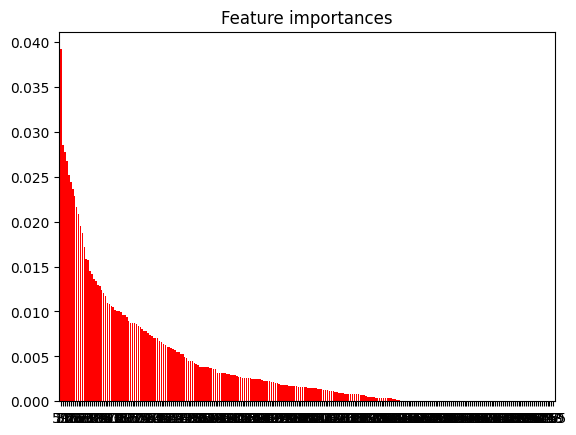

In [8]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024427) Topic4_ec
2. Feature 68 (0.023351) Topic55_ic
3. Feature 17 (0.022993) Topic12_ec
4. Feature 21 (0.022253) Topic14_ec
5. Feature 82 (0.021825) Topic63_ic
6. Feature 19 (0.021777) Topic13_ec
7. Feature 16 (0.021087) Topic12_ic
8. Feature 6 (0.021038) Topic4_ic
9. Feature 83 (0.020162) Topic63_ec
10. Feature 20 (0.020052) Topic14_ic
11. Feature 18 (0.019531) Topic13_ic
12. Feature 71 (0.019487) Topic56_ec
13. Feature 70 (0.018912) Topic56_ic
14. Feature 59 (0.018500) Topic42_ec
15. Feature 4 (0.017936) Topic3_ic
16. Feature 61 (0.017247) Topic51_ec
17. Feature 69 (0.016827) Topic55_ec
18. Feature 66 (0.016688) Topic54_ic
19. Feature 67 (0.015981) Topic54_ec
20. Feature 28 (0.013930) Topic19_ic
21. Feature 29 (0.013682) Topic19_ec
22. Feature 12 (0.012051) Topic9_ic
23. Feature 1 (0.011659) Topic1_ec
24. Feature 105 (0.011410) Topic74_ec
25. Feature 87 (0.011115) Topic65_ec
26. Feature 14 (0.010905) Topic10_ic
27. Feature 63 (0.010842) Topic52_ec
2

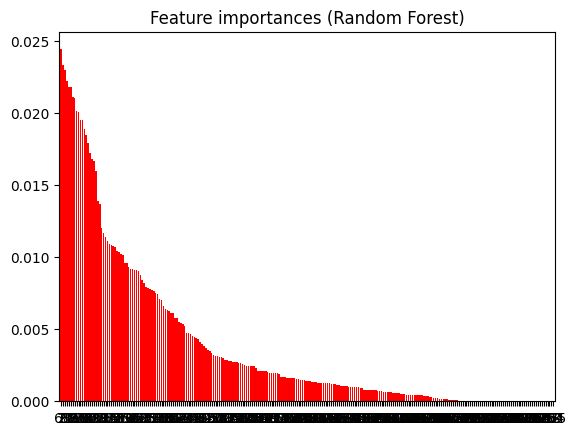

In [9]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.039201       0.018500
1         17       0.028596       0.022993
2         82       0.027758       0.021825
3         70       0.026757       0.018912
4         16       0.025207       0.021087
..       ...            ...            ...
251      216       0.000000       0.000000
252      217       0.000000       0.000000
253      218       0.000000       0.000000
254      219       0.000000       0.000000
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [11]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.0067643267555623 percentileRF: 0.007101799625754781


In [12]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.039201       0.018500
1        17       0.028596       0.022993
2        82       0.027758       0.021825
3        70       0.026757       0.018912
4        16       0.025207       0.021087
5         7       0.024401       0.024427
6        68       0.023617       0.023351
7        21       0.022902       0.022253
8        83       0.021666       0.020162
9        66       0.020895       0.016688
10        6       0.019504       0.021038
11       61       0.018777       0.017247
12       69       0.017137       0.016827
13       28       0.015794       0.013930
14       29       0.015732       0.013682
15       63       0.014528       0.010842
16       67       0.014215       0.015981
17       18       0.013627       0.019531
18       19       0.013382       0.021777
19       20       0.012953       0.020052
20      135       0.012892       0.007511
21       14       0.012359       0.010905
22    

## Dropping the feature which are not in the percentile

In [13]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [14]:
len(X.columns)

44

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA train test dataset

In [16]:
#X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

## Using 80 percentil dataset

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='log_loss', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)

voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.7s finished


[Voting] ....................... (1 of 2) Processing rf, total=   4.0s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[Voting] ...................... (2 of 2) Processing ada, total=  11.3s


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.1s finished


Accuracy (Voting Classifier): 0.98525


## Using PCA

In [18]:
"""from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='entropy', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)

voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

voting_clf.fit(X_train_pca, y_train_pca)

y_pred_voting = voting_clf.predict(X_test_pca)

accuracy_voting = accuracy_score(y_test_pca, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)"""

'from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier\nfrom sklearn.metrics import accuracy_score\n\nbase_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion=\'entropy\', max_features=\'log2\', oob_score=True, verbose=1)\nbase_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.5)\n\nvoting_clf = VotingClassifier(estimators=[(\'rf\', base_rf), (\'ada\', base_ada)], voting=\'soft\', verbose=True)\n\nvoting_clf.fit(X_train_pca, y_train_pca)\n\ny_pred_voting = voting_clf.predict(X_test_pca)\n\naccuracy_voting = accuracy_score(y_test_pca, y_pred_voting)\nprint("Accuracy (Voting Classifier):", accuracy_voting)'

# Loading test set

In [19]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Evaluation

## Using 80 percentil

In [20]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_param_logloss.csv', index=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.3s finished


## Using PCA

In [21]:
"""from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_test_test)

pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_scaled)

y_pred_rf = voting_clf.predict_proba(X_pca)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_PCA.csv', index=False)"""

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\nX_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)\n\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(X_test_test)\n\npca = PCA(n_components=50)\n\nX_pca = pca.fit_transform(X_scaled)\n\ny_pred_rf = voting_clf.predict_proba(X_pca)[:, 1]\n\ndf_verseny_public_test['target'] = y_pred_rf\n\ndf_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]\n\ndf_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_PCA.csv', index=False)"